# ЧАСТЬ №1. ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ ФОНДОВОГО РЫНКА.

 <b>рынок:</b> Бразилия<br>
 <b>период:</b> 2018 год

# 1. Оценка ожидаемых доходностей и стандартных отклонений.

# 2. Парето-оптимальные активы.

# 3. Value at Risk
### - Оценка VaR с уровнем доверия 0,95 для Парето-оптимальных активов рынка.
### - Какой из активов наиболее предпочтителен по этой характеристике?
### - Где он расположен на карте активов?

# 4. Conditional Value at Risk
### - Оценка CVaR с уровнем доверия 0,95 для Парето-оптимальных активов рынка.
### - Какой из активов наиболее предпочтителен по этой характеристике?
### - Где он расположен на карте активов?
### - Сравнение с результатом предыдущего пункта.

# 5. Распределение доходностей конкретного актива
### - Выбор нескольких интересных (значимых) активов рынка.
### - Можно ли считать наблюдаемые доходности конкретного актива повторной выборкой из некоторого распределения (белый шум)?
### - Поиск научных подходов к ответу на этот вопрос.

# 6. Нормальность распределений доходностей
### - Выбор нескольких интересных (значимых) активов рынка из разных производственных секторов.
### - В предположении, что наблюдаемые доходности являются повторной выборкой из некоторого распределения исследовать (выборочно) распределения доходностей выбранных активов.
### - Можно ли считать, что распределения доходностей подчиняются нормальному закону распределения?
### - Если ответ отрицательный, какие другие законы распределения доходностей соответствуют данным наблюдений?


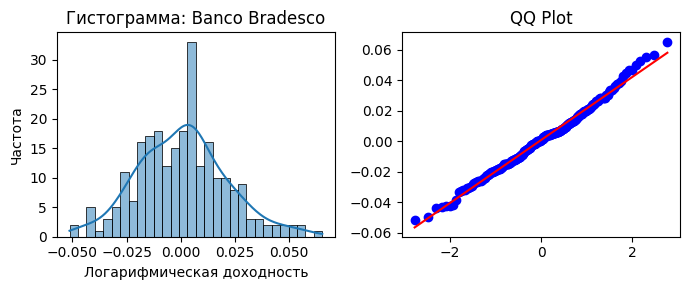

========== Banco Bradesco ======================================== 

Статистика = 0.9927924074809392, p-значение = 0.2833662546270422
Распределение логарифмических доходностей можно считать нормальным (p > 0.05) 



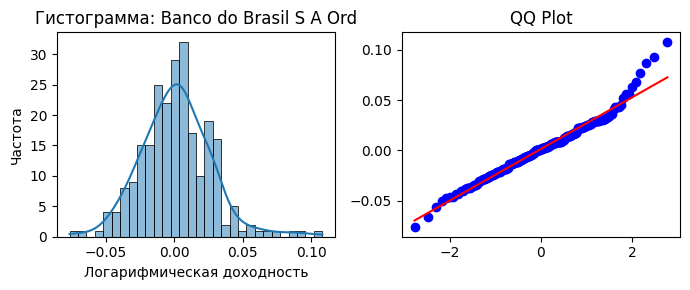

========== Banco do Brasil S A Ord ======================================== 

Статистика = 0.974777907655699, p-значение = 0.0002473038588551745
Распределение логарифмических доходностей не является нормальным (p <= 0.05) 



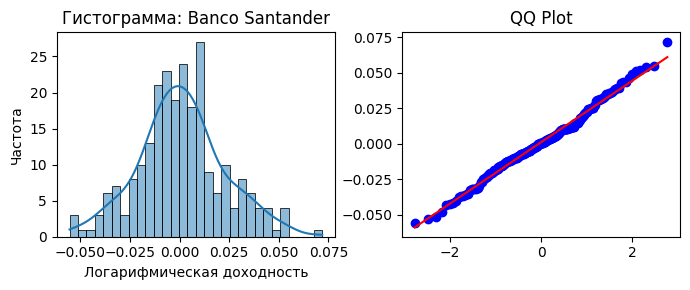

========== Banco Santander ======================================== 

Статистика = 0.9914441442533785, p-значение = 0.1656840027895783
Распределение логарифмических доходностей можно считать нормальным (p > 0.05) 



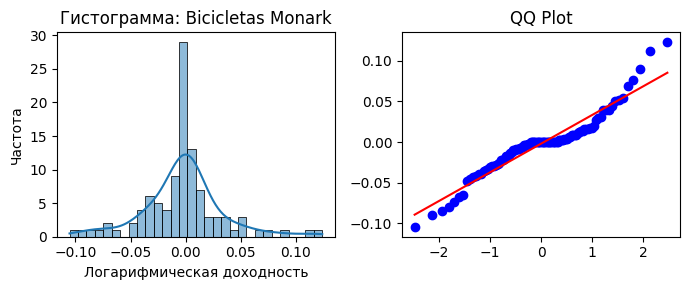

========== Bicicletas Monark ======================================== 

Статистика = 0.9227293149774158, p-значение = 1.3786628945379689e-05
Распределение логарифмических доходностей не является нормальным (p <= 0.05) 



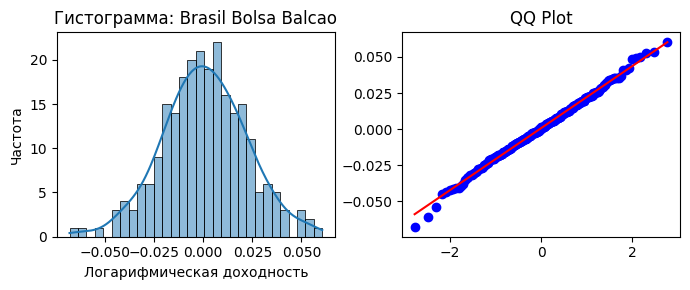

========== Brasil Bolsa Balcao ======================================== 

Статистика = 0.9970517918411603, p-значение = 0.9337716196190343
Распределение логарифмических доходностей можно считать нормальным (p > 0.05) 



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sheets = pd.ExcelFile('data.xlsx').sheet_names

for sheet in sheets[:5]:
    df = pd.read_excel('data.xlsx', sheet_name=sheet)

    log_returns = df['log_return'].dropna()  # Удаляем NaN, если они есть

    plt.figure(figsize=(7, 3))

    # Построение гистограммы
    plt.subplot(1, 2, 1)
    sns.histplot(log_returns, bins=30, kde=True)
    plt.title(f'Гистограмма: {sheet}')
    plt.xlabel('Логарифмическая доходность')
    plt.ylabel('Частота')

    # QQ plot
    plt.subplot(1, 2, 2)
    stats.probplot(log_returns, dist="norm", plot=plt)
    plt.title(f'QQ Plot')
    plt.xlabel('')
    plt.ylabel('')

    # Показ графиков
    plt.tight_layout()
    plt.show()

    # Тест Шапиро-Уилка

    print('='*10, sheet, '='*40, '\n')
    
    stat, p_value = stats.shapiro(log_returns)
    print(f'Статистика = {stat}, p-значение = {p_value}')
    if p_value > 0.05:
        print(f'Распределение логарифмических доходностей можно считать нормальным (p > 0.05) \n')
    else:
        print(f'Распределение логарифмических доходностей не является нормальным (p <= 0.05) \n')

# 7. Поиск чего-нибудь интересного (необычного) на рынке.